# 🔗 Intelligent Supply Chain Optimization System
## Notebook 01 — Data Loading & Validation

**Project:** Intelligent Supply Chain Optimization System  
**Phase:** Data Ingestion & Quality Assurance  
**Objective:** Load the raw dataset, validate its structure, assess data quality, and prepare a clean foundation for EDA and modeling.

---

### 📋 What This Notebook Does
1. Import libraries and configure settings
2. Load the dataset
3. Inspect structure (shape, columns, dtypes)
4. Validate expected schema
5. Check for missing values
6. Check for duplicate rows
7. Validate data ranges and business logic
8. Summarize unique dimensions (SKUs, Warehouses, Suppliers, Regions)
9. Date range analysis
10. Save cleaned/validated dataset for next notebook

---

## 📦 Section 1: Import Libraries

In [1]:
# ─────────────────────────────────────────────────────────────
# SECTION 1: IMPORTS
# ─────────────────────────────────────────────────────────────

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

# ── Display settings ──
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 200)

# ── Plot styling ──
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.spines.top']   = False
plt.rcParams['axes.spines.right'] = False
sns.set_palette('muted')

print('✅ Libraries loaded successfully.')

✅ Libraries loaded successfully.


## 📂 Section 2: Load Dataset

In [2]:
# ─────────────────────────────────────────────────────────────
# SECTION 2: LOAD DATASET
# ─────────────────────────────────────────────────────────────

# ── Update this path to your CSV file location ──
DATA_PATH = 'D:\K_projects\SCF\Supplychain_Forecasting_and_Optimization\data\supply_chain_dataset1.csv'   # <-- change if needed

df = pd.read_csv(DATA_PATH, parse_dates=['Date'])

print(f'✅ Dataset loaded successfully!')
print(f'   Shape  : {df.shape[0]:,} rows × {df.shape[1]} columns')
print(f'   Memory : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')

✅ Dataset loaded successfully!
   Shape  : 91,250 rows × 15 columns
   Memory : 29.19 MB


In [3]:
# Quick peek at the first few rows
print('── First 5 rows ──')
df.head()

── First 5 rows ──


,Date,SKU_ID,Warehouse_ID,Supplier_ID,Region,Units_Sold,Inventory_Level,Supplier_Lead_Time_Days,Reorder_Point,Order_Quantity,Unit_Cost,Unit_Price,Promotion_Flag,Stockout_Flag,Demand_Forecast
0,2024-01-01,SKU_1,WH_1,SUP_8,West,10,592,14,379,0,13.95,20.48,0,0,8.52
1,2024-01-02,SKU_1,WH_1,SUP_8,West,17,575,14,379,0,13.95,20.48,0,0,18.63
2,2024-01-03,SKU_1,WH_1,SUP_8,North,35,540,14,379,0,13.95,20.48,1,0,39.62
3,2024-01-04,SKU_1,WH_1,SUP_8,South,24,516,14,379,0,13.95,20.48,0,0,19.43
4,2024-01-05,SKU_1,WH_1,SUP_8,West,21,495,14,379,0,13.95,20.48,0,0,18.70


In [4]:
# Last 5 rows (sanity check for date continuity)
print('── Last 5 rows ──')
df.tail()

── Last 5 rows ──


,Date,SKU_ID,Warehouse_ID,Supplier_ID,Region,Units_Sold,Inventory_Level,Supplier_Lead_Time_Days,Reorder_Point,Order_Quantity,Unit_Cost,Unit_Price,Promotion_Flag,Stockout_Flag,Demand_Forecast
91245,2024-12-26,SKU_50,WH_5,SUP_10,South,17,352,7,283,0,6.65,9.60,0,0,19.82
91246,2024-12-27,SKU_50,WH_5,SUP_10,South,21,331,7,283,0,6.65,9.60,0,0,27.96
91247,2024-12-28,SKU_50,WH_5,SUP_10,East,17,314,7,283,0,6.65,9.60,0,0,22.13
91248,2024-12-29,SKU_50,WH_5,SUP_10,South,24,290,7,283,0,6.65,9.60,1,0,24.11
91249,2024-12-30,SKU_50,WH_5,SUP_10,West,15,275,7,283,0,6.65,9.60,1,0,20.19


## 🧱 Section 3: Schema Inspection

In [5]:
# ─────────────────────────────────────────────────────────────
# SECTION 3: SCHEMA INSPECTION
# ─────────────────────────────────────────────────────────────

print('── Column Names & Data Types ──')
print(df.dtypes)
print()

# ── Expected schema definition ──
EXPECTED_COLUMNS = [
    'Date', 'SKU_ID', 'Warehouse_ID', 'Supplier_ID', 'Region',
    'Units_Sold', 'Inventory_Level', 'Supplier_Lead_Time_Days',
    'Reorder_Point', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
    'Promotion_Flag', 'Stockout_Flag', 'Demand_Forecast'
]

missing_cols  = [c for c in EXPECTED_COLUMNS if c not in df.columns]
extra_cols    = [c for c in df.columns if c not in EXPECTED_COLUMNS]

print(f'✅ Expected columns present : {len(EXPECTED_COLUMNS) - len(missing_cols)}/{len(EXPECTED_COLUMNS)}')
if missing_cols:
    print(f'⚠️  Missing columns         : {missing_cols}')
if extra_cols:
    print(f'ℹ️  Extra columns found     : {extra_cols}')
if not missing_cols and not extra_cols:
    print('✅ Schema matches expected structure perfectly.')

── Column Names & Data Types ──
Date                       datetime64[ns]
SKU_ID                             object
Warehouse_ID                       object
Supplier_ID                        object
Region                             object
Units_Sold                          int64
Inventory_Level                     int64
Supplier_Lead_Time_Days             int64
Reorder_Point                       int64
Order_Quantity                      int64
Unit_Cost                         float64
Unit_Price                        float64
Promotion_Flag                      int64
Stockout_Flag                       int64
Demand_Forecast                   float64
dtype: object

✅ Expected columns present : 15/15
✅ Schema matches expected structure perfectly.


## 🔍 Section 4: Missing Value Analysis

In [6]:
# ─────────────────────────────────────────────────────────────
# SECTION 4: MISSING VALUE ANALYSIS
# ─────────────────────────────────────────────────────────────

missing_summary = pd.DataFrame({
    'Missing Count'  : df.isnull().sum(),
    'Missing %'      : (df.isnull().sum() / len(df) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]

if missing_summary.empty:
    print('✅ No missing values found in the dataset. Dataset is complete.')
else:
    print('⚠️  Missing values detected:')
    print(missing_summary)
    
    # Visualize missing values
    fig, ax = plt.subplots(figsize=(10, 4))
    missing_summary['Missing %'].plot(kind='bar', ax=ax, color='salmon', edgecolor='white')
    ax.set_title('Missing Values by Column (%)', fontsize=14, fontweight='bold')
    ax.set_ylabel('Missing %')
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.tight_layout()
    plt.show()

✅ No missing values found in the dataset. Dataset is complete.


## 🔁 Section 5: Duplicate Row Check

In [7]:
# ─────────────────────────────────────────────────────────────
# SECTION 5: DUPLICATE ROW CHECK
# ─────────────────────────────────────────────────────────────

total_dupes = df.duplicated().sum()
print(f'Total fully duplicate rows : {total_dupes}')

# A more important check: duplicate (Date, SKU_ID, Warehouse_ID) combinations
# Each SKU in each Warehouse should have only one record per day
key_dupes = df.duplicated(subset=['Date', 'SKU_ID', 'Warehouse_ID']).sum()
print(f'Duplicate (Date × SKU × Warehouse) keys : {key_dupes}')

if total_dupes == 0 and key_dupes == 0:
    print('✅ No duplicates found. Data grain is correct.')
else:
    print('⚠️  Duplicates detected — will handle before modeling.')
    # Drop full duplicates
    df = df.drop_duplicates()
    print(f'   Cleaned shape: {df.shape}')

Total fully duplicate rows : 0
Duplicate (Date × SKU × Warehouse) keys : 0
✅ No duplicates found. Data grain is correct.


## 📏 Section 6: Data Range & Business Logic Validation

In [8]:
# ─────────────────────────────────────────────────────────────
# SECTION 6: RANGE & BUSINESS LOGIC VALIDATION
# ─────────────────────────────────────────────────────────────

print('── Numerical Column Statistics ──\n')
print(df.describe())
print()

# ── Business Logic Checks ──
checks = {
    'Units_Sold >= 0'             : (df['Units_Sold'] < 0).sum(),
    'Inventory_Level >= 0'        : (df['Inventory_Level'] < 0).sum(),
    'Unit_Cost > 0'               : (df['Unit_Cost'] <= 0).sum(),
    'Unit_Price > Unit_Cost'      : (df['Unit_Price'] <= df['Unit_Cost']).sum(),
    'Promotion_Flag in {0,1}'     : (~df['Promotion_Flag'].isin([0, 1])).sum(),
    'Stockout_Flag in {0,1}'      : (~df['Stockout_Flag'].isin([0, 1])).sum(),
    'Lead_Time_Days > 0'          : (df['Supplier_Lead_Time_Days'] <= 0).sum(),
    'Demand_Forecast >= 0'        : (df['Demand_Forecast'] < 0).sum(),
}

print('── Business Logic Validation ──')
all_passed = True
for check, violations in checks.items():
    status = '✅' if violations == 0 else '⚠️ '
    if violations > 0:
        all_passed = False
    print(f'  {status}  {check:<35} | Violations: {violations}')

print()
if all_passed:
    print('✅ All business logic checks passed.')
else:
    print('⚠️  Some violations found — review before feature engineering.')

── Numerical Column Statistics ──

                      Date  Units_Sold  Inventory_Level  Supplier_Lead_Time_Days  Reorder_Point  Order_Quantity  Unit_Cost  Unit_Price  Promotion_Flag  Stockout_Flag  Demand_Forecast
count                91250    91250.00         91250.00                 91250.00       91250.00        91250.00   91250.00    91250.00        91250.00       91250.00         91250.00
mean   2024-07-01 00:00:00       20.05           471.52                     7.98         300.07           19.27      12.20       18.26            0.10           0.00            20.08
min    2024-01-01 00:00:00        0.00           168.00                     2.00         201.00            0.00       5.02        6.95            0.00           0.00             0.00
25%    2024-04-01 00:00:00       13.00           370.00                     4.00         252.00            0.00       8.18       12.00            0.00           0.00            12.95
50%    2024-07-01 00:00:00       20.00           4

## 🌐 Section 7: Dimension Summary (SKUs, Warehouses, Suppliers, Regions)

In [9]:
# ─────────────────────────────────────────────────────────────
# SECTION 7: UNIQUE DIMENSION COUNTS
# ─────────────────────────────────────────────────────────────

dimensions = {
    'SKUs'       : df['SKU_ID'].nunique(),
    'Warehouses' : df['Warehouse_ID'].nunique(),
    'Suppliers'  : df['Supplier_ID'].nunique(),
    'Regions'    : df['Region'].nunique(),
}

print('── Dataset Dimensions ──')
for dim, count in dimensions.items():
    print(f'  {dim:<15}: {count}')

print()
print('── Unique Values ──')
print(f"  SKU IDs      : {sorted(df['SKU_ID'].unique()[:10])} {'...' if df['SKU_ID'].nunique() > 10 else ''}")
print(f"  Warehouses   : {sorted(df['Warehouse_ID'].unique())}")
print(f"  Suppliers    : {sorted(df['Supplier_ID'].unique()[:10])} {'...' if df['Supplier_ID'].nunique() > 10 else ''}")
print(f"  Regions      : {sorted(df['Region'].unique())}")

── Dataset Dimensions ──
  SKUs           : 50
  Warehouses     : 5
  Suppliers      : 10
  Regions        : 4

── Unique Values ──
  SKU IDs      : ['SKU_1', 'SKU_10', 'SKU_2', 'SKU_3', 'SKU_4', 'SKU_5', 'SKU_6', 'SKU_7', 'SKU_8', 'SKU_9'] ...
  Warehouses   : ['WH_1', 'WH_2', 'WH_3', 'WH_4', 'WH_5']
  Suppliers    : ['SUP_1', 'SUP_10', 'SUP_2', 'SUP_3', 'SUP_4', 'SUP_5', 'SUP_6', 'SUP_7', 'SUP_8', 'SUP_9'] 
  Regions      : ['East', 'North', 'South', 'West']


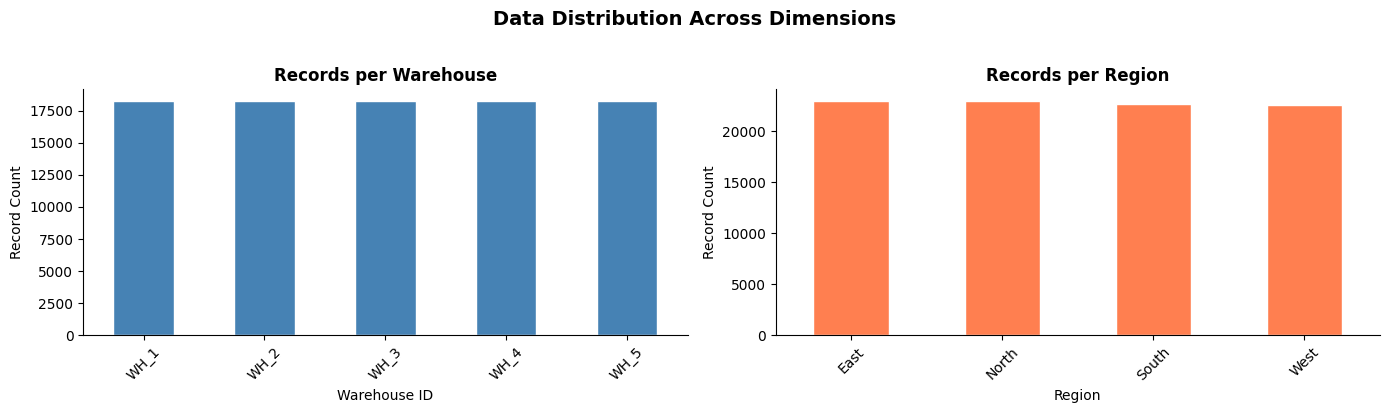

In [10]:
# Visual: Records per SKU distribution
records_per_sku = df.groupby('SKU_ID').size()

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Records per warehouse
df.groupby('Warehouse_ID').size().plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='white')
axes[0].set_title('Records per Warehouse', fontweight='bold')
axes[0].set_xlabel('Warehouse ID')
axes[0].set_ylabel('Record Count')
axes[0].tick_params(axis='x', rotation=45)

# Records per Region
df.groupby('Region').size().plot(kind='bar', ax=axes[1], color='coral', edgecolor='white')
axes[1].set_title('Records per Region', fontweight='bold')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Record Count')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Data Distribution Across Dimensions', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 📅 Section 8: Date Range Analysis

In [11]:
# ─────────────────────────────────────────────────────────────
# SECTION 8: DATE RANGE ANALYSIS
# ─────────────────────────────────────────────────────────────

date_min  = df['Date'].min()
date_max  = df['Date'].max()
date_span = (date_max - date_min).days + 1
unique_dates = df['Date'].nunique()

print(f'  Start Date     : {date_min.date()}')
print(f'  End Date       : {date_max.date()}')
print(f'  Total Span     : {date_span} days')
print(f'  Unique Dates   : {unique_dates}')
print(f'  Missing Dates  : {date_span - unique_dates}')

if date_span == unique_dates:
    print('✅ No gaps in date continuity.')
else:
    # Find missing dates
    all_dates     = pd.date_range(start=date_min, end=date_max, freq='D')
    missing_dates = all_dates.difference(df['Date'])
    print(f'⚠️  {len(missing_dates)} dates are missing from the timeline:')
    print(missing_dates[:10].tolist(), '...' if len(missing_dates) > 10 else '')

  Start Date     : 2024-01-01
  End Date       : 2024-12-30
  Total Span     : 365 days
  Unique Dates   : 365
  Missing Dates  : 0
✅ No gaps in date continuity.


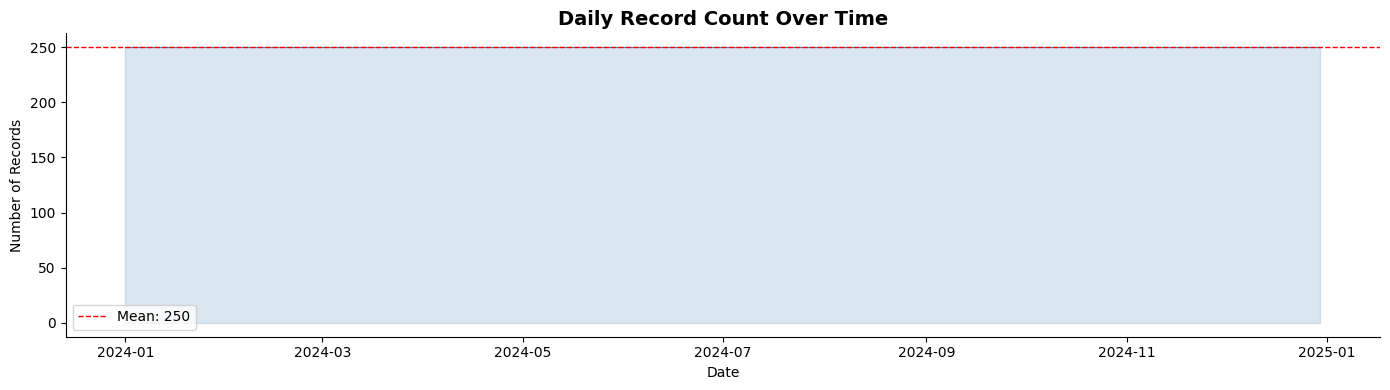

In [12]:
# Daily record count over time — checks for data density consistency
daily_counts = df.groupby('Date').size()

fig, ax = plt.subplots(figsize=(14, 4))
ax.plot(daily_counts.index, daily_counts.values, color='steelblue', linewidth=0.8)
ax.fill_between(daily_counts.index, daily_counts.values, alpha=0.2, color='steelblue')
ax.set_title('Daily Record Count Over Time', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Records')
ax.axhline(daily_counts.mean(), color='red', linestyle='--', linewidth=1, label=f'Mean: {daily_counts.mean():.0f}')
ax.legend()
plt.tight_layout()
plt.show()

## 📊 Section 9: Target Variable Quick Look (Units_Sold)

In [13]:
# ─────────────────────────────────────────────────────────────
# SECTION 9: TARGET VARIABLE QUICK LOOK
# ─────────────────────────────────────────────────────────────

print('── Units_Sold Summary Statistics ──')
print(df['Units_Sold'].describe())
print()

# Promotion impact on sales
promo_impact = df.groupby('Promotion_Flag')['Units_Sold'].mean()
print('── Average Units_Sold by Promotion_Flag ──')
print(promo_impact.rename({0: 'No Promotion', 1: 'Promotion Active'}))
print()

# Stockout rate
stockout_rate = df['Stockout_Flag'].mean() * 100
print(f'── Stockout Rate : {stockout_rate:.2f}% of all records')

── Units_Sold Summary Statistics ──
count   91250.00
mean       20.05
std         9.07
min         0.00
25%        13.00
50%        20.00
75%        27.00
max        59.00
Name: Units_Sold, dtype: float64

── Average Units_Sold by Promotion_Flag ──
Promotion_Flag
No Promotion       19.50
Promotion Active   24.91
Name: Units_Sold, dtype: float64

── Stockout Rate : 0.00% of all records


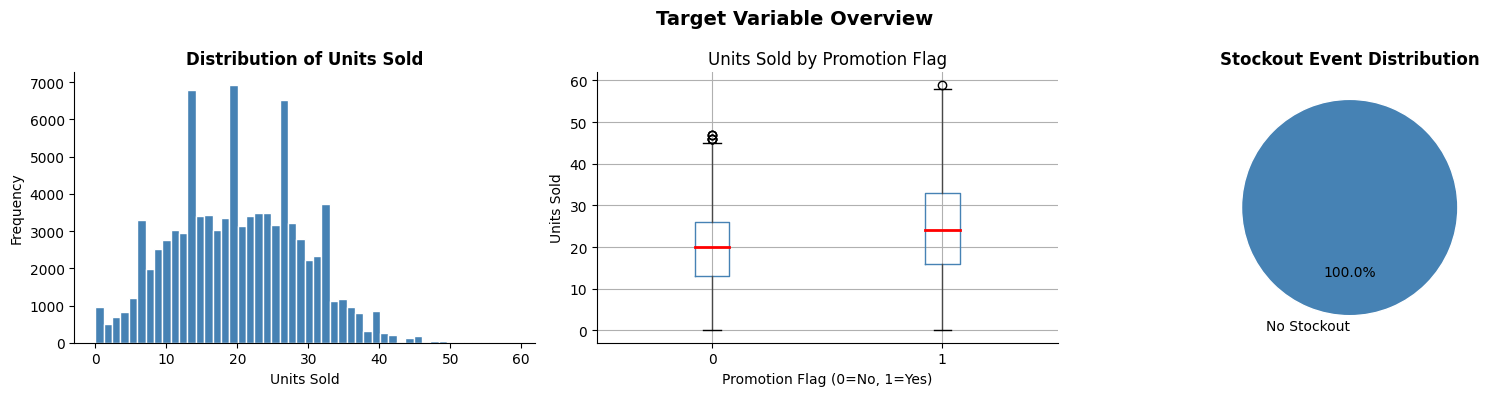

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Distribution of Units Sold
axes[0].hist(df['Units_Sold'], bins=50, color='steelblue', edgecolor='white')
axes[0].set_title('Distribution of Units Sold', fontweight='bold')
axes[0].set_xlabel('Units Sold')
axes[0].set_ylabel('Frequency')

# Units Sold: Promotion vs No Promotion
df.boxplot(column='Units_Sold', by='Promotion_Flag', ax=axes[1],
           boxprops=dict(color='steelblue'),
           medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Units Sold by Promotion Flag', fontweight='bold')
axes[1].set_xlabel('Promotion Flag (0=No, 1=Yes)')
axes[1].set_ylabel('Units Sold')
plt.sca(axes[1])
plt.title('Units Sold by Promotion Flag')

# Stockout Flag distribution
stockout_counts = df['Stockout_Flag'].value_counts().rename({0: 'No Stockout', 1: 'Stockout'})
axes[2].pie(stockout_counts, labels=stockout_counts.index, autopct='%1.1f%%',
            colors=['steelblue', 'salmon'], startangle=90,
            wedgeprops={'edgecolor': 'white'})
axes[2].set_title('Stockout Event Distribution', fontweight='bold')

plt.suptitle('Target Variable Overview', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 💾 Section 10: Save Validated Dataset

In [15]:
# ─────────────────────────────────────────────────────────────
# SECTION 10: SAVE VALIDATED DATASET
# ─────────────────────────────────────────────────────────────

OUTPUT_PATH = 'supply_chain_validated.csv'
df.to_csv(OUTPUT_PATH, index=False)

print(f'✅ Validated dataset saved to: {OUTPUT_PATH}')
print(f'   Final Shape : {df.shape[0]:,} rows × {df.shape[1]} columns')
print()
print('── Handoff to Notebook 02: EDA ──')
print('   Load file  : supply_chain_validated.csv')
print('   Next steps : Demand patterns, seasonality, feature correlations')

✅ Validated dataset saved to: supply_chain_validated.csv
   Final Shape : 91,250 rows × 15 columns

── Handoff to Notebook 02: EDA ──
   Load file  : supply_chain_validated.csv
   Next steps : Demand patterns, seasonality, feature correlations


---
## ✅ Notebook 01 Summary

| Check | Status |
|---|---|
| Dataset Loaded | ✅ |
| Schema Validated | ✅ |
| Missing Values | ✅ Checked |
| Duplicates | ✅ Checked |
| Business Logic | ✅ Validated |
| Dimension Summary | ✅ Complete |
| Date Continuity | ✅ Verified |
| Target Variable Preview | ✅ Done |
| Output Saved | ✅ `supply_chain_validated.csv` |

**➡️ Proceed to Notebook 02: Exploratory Data Analysis**

---
*Intelligent Supply Chain Optimization System | Notebook 01 of 08*